<a href="https://colab.research.google.com/github/BasiraS/data_analytics_2/blob/main/Python/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Unit4_L5_ML_Amazon_RandomForest_Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Basira Shirzad

# Date: 01-19-2021

# Amazon Alexa Review Ratings Classification - Random Forest Algorithm


# Problem Statement

- Dataset consists of 3000 Amazon customer reviews, star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots.
- The objective is to discover insights into consumer reviews and perfrom sentiment analysis on the data.
- Dataset: www.kaggle.com/sid321axn/amazon-alexa-reviews

# Task #1: Environment Set Up

## Import Libraries

In [268]:
# Import Pandas for data manipulation using dataframes
import pandas as pd 

# Import Numpy for data statistical analysis 
import numpy as np 

# Import matplotlib for data visualisation
import matplotlib.pyplot as plt 

# Import seaborn for statistical data visualization
import seaborn as sns 
# %matplotlib inline

# Task #2: Data Collection

In [269]:
# Import the Amazon data set into a pandas dataframe
df_alexa = pd.read_csv('https://raw.githubusercontent.com/niteen11/lagcc_data_analytics_micro_credential/master/Unit%204%20-%20Mahine%20Learning/amazon_alexa.tsv', sep='\t')

In [270]:
# Check the head of the dataframe to get a clear idea of all the columns in the dataframe
df_alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [271]:
# List of Columns in the dataframe
df_alexa.keys()

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [272]:
# Check the tail of the dataframe to get a clear idea of data and where it ends
df_alexa.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [273]:
# View the data for the "verified_reviews" col
df_alexa['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

# Task #3: EDA

In [274]:
# Storing all data that has positive feedback from customers 
positive = df_alexa[df_alexa['feedback']==1]
positive

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [275]:
# Storing all data that has negative feedback from customers 
negative = df_alexa[df_alexa['feedback']==0]
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


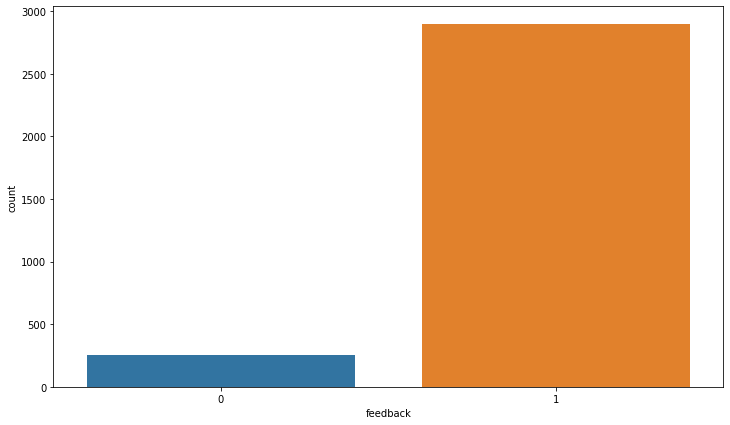

In [276]:
# Number of positive and negative feedbacks given by Amazon customers
plt.figure(figsize = (12,7))
sns.countplot(df_alexa['feedback'], label = "Count") 

* This is a count plot that shows the number of positive and negative feedbacks given by the customers.
* This figure shows a trend that there was more positive feedbacks than negative feedbacks given by Amazon customers. 
* 0 indicates negative feedback and 1 indicates positive feedback.

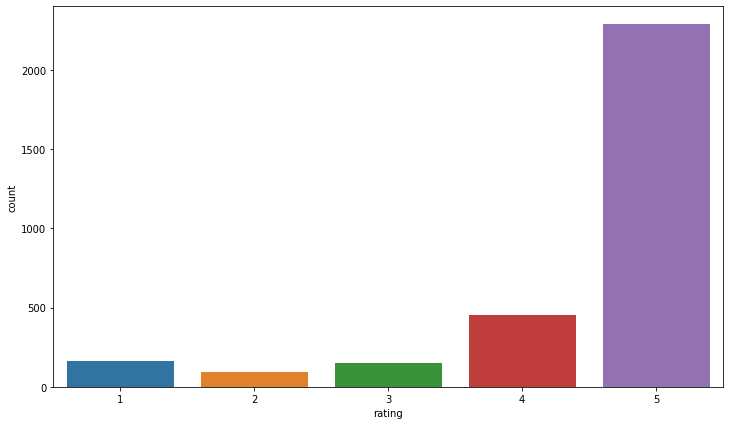

In [277]:
# Number count of each rating
plt.figure(figsize = (12,7))
sns.countplot(x = 'rating', data = df_alexa)

* This is a count plot that shows the number of customers choosing a rating for the Amazon product. 
* This figure shows a trend that many customers gave a rating of 5 for the Amazon product, which means they really liked the product. 

Text(0, 0.5, 'Count')

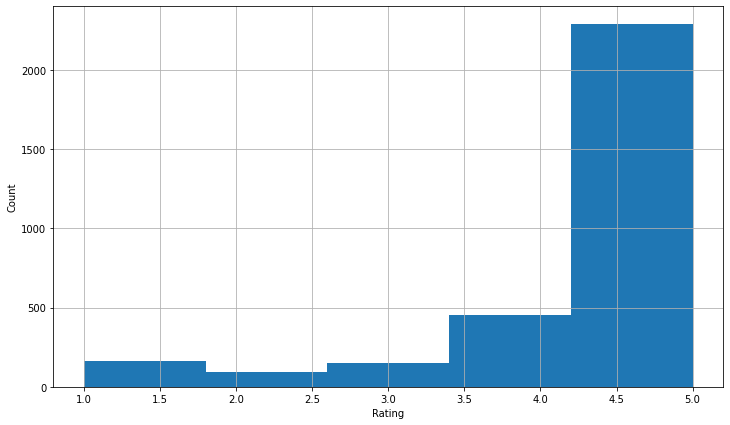

In [278]:
# Number count of each rating (scale: .5)
plt.figure(figsize = (12,7))
df_alexa['rating'].hist(bins = 5)
plt.xlabel("Rating")
plt.ylabel("Count")

* This is a histogram that shows the number of customers choosing a rating for the Amazon product. 
* This figure shows a trend that many customers gave a rating of 4.5 and 5 for the Amazon product, which means they really liked the product. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

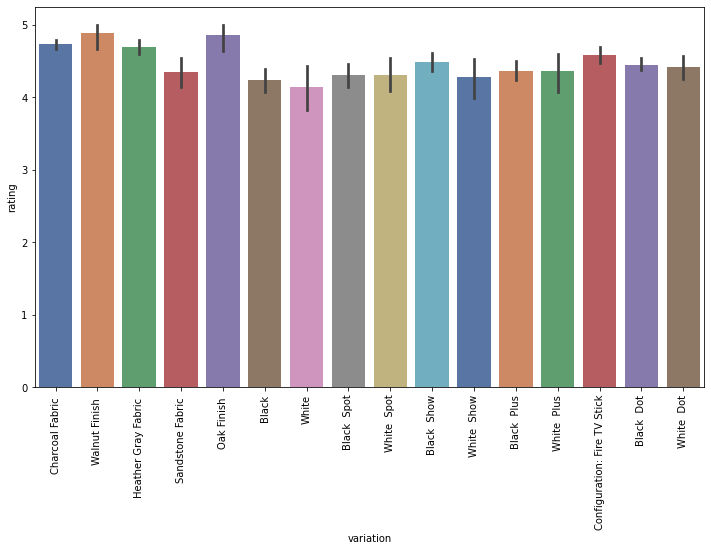

In [279]:
# Barplot showing each variation of the Amazon product and the rating it was given 
plt.figure(figsize = (12,7))
sns.barplot(x = 'variation', y='rating', data=df_alexa, palette = 'deep')
plt.xticks(rotation=90)

* This is a bar plot that shows the rating each variation of Amazon's product received. 
* This figure shows a trend that many customers gave good ratings for all of the variations, but Walnut Finish and Oak Finish got the highest rating and White got the lowest rating compared to the rest. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

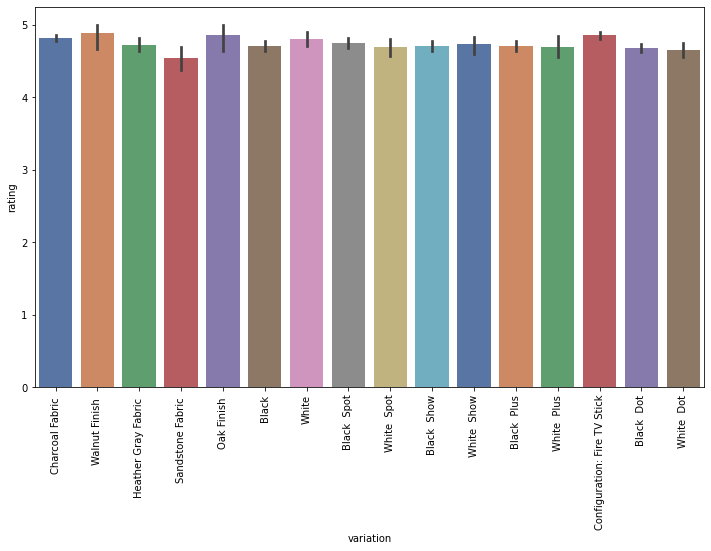

In [331]:
# Barplot showing each variation of the Amazon product and rating given 
# by cutomers that had negative feedback 
plt.figure(figsize = (12,7))
sns.barplot(x = 'variation', y='rating', data=positive, palette = 'deep')
plt.xticks(rotation=90)

* This is a bar plot that shows the rating each variation of Amazon's product received by customers that had a positive feedback.
* This figure shows a trend that many customers with positive feedback gave good ratings for all of the variations. There is no significant difference in any one of the variations. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

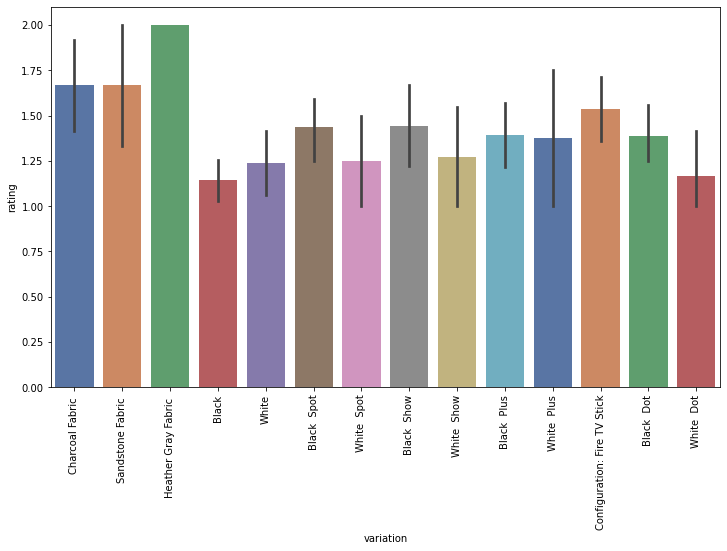

In [330]:
# Barplot showing each variation of the Amazon product and rating given 
# by cutomers that had negative feedback 
plt.figure(figsize = (12,7))
sns.barplot(x = 'variation', y='rating', data=negative, palette = 'deep')
plt.xticks(rotation=90)

* This is a bar plot that shows the rating each variation of Amazon's product received by customers that had a negative feedback.
* This figure shows a trend that many customers with negative feedback gave low ratings for all of the variations, with the Heather Gray Fabric having a greater rating than the rest and Black having a lower rating than the rest. 

# Task#4: Data Cleaning/ Feature Engineering

In [280]:
# Drop the date col from the dataframe 
df_alexa = df_alexa.drop(['date', 'rating'],axis=1)

* The date col in the dataframe is not necessary information for the model, so it was removed from the dataframe. 

In [281]:
# Check to see if the date column was removed
df_alexa

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [282]:
# Convert the variation col, which is a categorical variable into dummy/indicator variables
variation_dummies = pd.get_dummies(df_alexa['variation'], drop_first = True)

In [283]:
# View the new data frame
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


* For the model, there cannot be any categorial variables, hence, it was important to create a new dataframe that includes all the variations of the Amazon product with indicator variable. 

In [284]:
# Drop the variation col from df_alexa since we created a dataframe for it
df_alexa.drop(['variation'], axis=1, inplace=True)

In [285]:
# Combine the new dataframe with the previous one 
df_alexa = pd.concat([df_alexa, variation_dummies], axis=1)

In [286]:
# Check to see if information from both dateframes is present
df_alexa

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In the dataframe, the column, "verified_reviews" is a categorial variable so to convert that collection of text to a matrix of token counts, we use the Count Vectorizer from the sklearn library. 

In [287]:
# Import from the sklearn library the Count Vectorizer 
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
alexa_countvectorizer = vectorizer.fit_transform(df_alexa['verified_reviews'])


In [288]:
# View the size of the matrix just created
alexa_countvectorizer.shape

(3150, 4044)

In [289]:
# Check to see it is a matrix
type(alexa_countvectorizer)

scipy.sparse.csr.csr_matrix

In [290]:
# View the featured names from the matrix
print(vectorizer.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [291]:
# View the matrix as the array
print(alexa_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [292]:
# Drop the verified_reviews col from df_alexa since we created an array for it
df_alexa.drop(['verified_reviews'], axis=1, inplace=True)
reviews = pd.DataFrame(alexa_countvectorizer.toarray())

In [293]:
# Combine the array of the verified_reviews with the current dataframe
df_alexa = pd.concat([df_alexa, reviews], axis=1)

In [294]:
# Check to see if all information is present
df_alexa

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,...,4004,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [295]:
# Drop the target label coloumn
X = df_alexa.drop(['feedback'], axis=1)

* We need to drop the feedback col from the dataframe because that information should not be fed to model because that model has to predict that value.

In [296]:
# View the final dataframe, which is the input to the model
X

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,4004,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [297]:
# View the final dataframe, which is the output 
y = df_alexa['feedback']

# Task #5: Model Building and Model Training

In [298]:
# Import from the sklearn library the train_test_split
from sklearn.model_selection import train_test_split

In [299]:
# Split the train data frame so you have a portion of data to train the model and then later test the model
# 20% of the data will be tested and 80% of the data will be trained
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

In [300]:
# View the size of the training data input
X_train.shape

(2520, 4059)

In [301]:
# View the size of the testing data input
X_test.shape

(630, 4059)

In [302]:
# View the size of the training data output
y_train.shape

(2520,)

In [303]:
# View the size of the testing data output
y_test.shape

(630,)

In [304]:
# Import from the sklearn library the RandomForestClassifier to build the model
from sklearn.ensemble import RandomForestClassifier

# Build the Random Forest Classifier Model
randomforest_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
randomforest_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Task #6: Model Evaluation

In [305]:
# Import from the sklearn library the confusion matrix to view the performance of the model
from sklearn.metrics import confusion_matrix

# Import from the sklearn library the classification report to view the evaluation of the model
from sklearn.metrics import classification_report

## Training Data

In [306]:
# Store the prediction result of training data of the Random Forest Classifier Model 
y_predict_train = randomforest_classifier.predict(X_train)

### Confusion Matrix 

In [307]:
# Store the result of the confusion matrix
cm = confusion_matrix(y_train, y_predict_train)

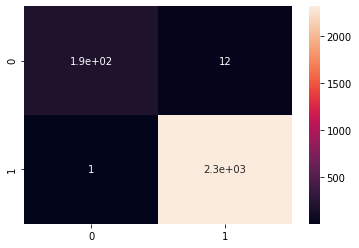

In [308]:
# View the confusion matrix of the Random Forest Classifier Model 
sns.heatmap(cm, annot=True)

### Classification Report

In [309]:
# Check the evaluation of the Random Forest Classifier Model
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       198
           1       0.99      1.00      1.00      2322

    accuracy                           0.99      2520
   macro avg       0.99      0.97      0.98      2520
weighted avg       0.99      0.99      0.99      2520



## Testing Data

In [310]:
# Store the prediction result of training data of the Random Forest Classifier Model 
y_predict = randomforest_classifier.predict(X_test)

### Confusion Matrix

In [311]:
# Store the result of the confusion matrix
cm = confusion_matrix(y_test, y_predict)

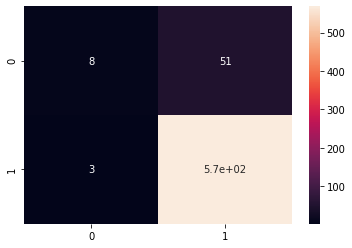

In [312]:
# View the confusion matrix of the Random Forest Classifier Model 
sns.heatmap(cm, annot=True)

### Classification Report

In [313]:
# Check the evaluation of the Random Forest Classifier Model
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.73      0.14      0.23        59
           1       0.92      0.99      0.95       571

    accuracy                           0.91       630
   macro avg       0.82      0.57      0.59       630
weighted avg       0.90      0.91      0.89       630



# Task #7 Model Performance Improvement 

In [314]:
# Drop the variations and add review length as a feature instead
df_alexa = pd.read_csv('https://raw.githubusercontent.com/niteen11/lagcc_data_analytics_micro_credential/master/Unit%204%20-%20Mahine%20Learning/amazon_alexa.tsv', sep='\t')

In [315]:
# Include the review length into the dataframe
df_alexa = pd.concat([df_alexa, pd.DataFrame(alexa_countvectorizer.toarray())], axis = 1)

In [316]:
# Check to see if the information was included
df_alexa

,rating,date,variation,verified_reviews,feedback,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,...,4004,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,5,31-Jul-18,Charcoal Fabric,Music,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [317]:
# Include the length column into the data frame 
df_alexa['length'] = df_alexa['verified_reviews'].apply(len)

In [318]:
# Store the modified dataframe to X, which is the input to the model
X = df_alexa.drop(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], axis = 1)

In [319]:
# View the final dataframe, which is the input to the model
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043,length
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,195
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,172
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50
3146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,135
3147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,441
3148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,380


In [320]:
y = df_alexa['feedback']

In [321]:
# Import from the sklearn library the train_test_split
from sklearn.model_selection import train_test_split

In [322]:
# Split the train data frame so you have a portion of data to train the model and then later test the model
# 20% of the data will be tested and 80% of the data will be trained
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [323]:
# Import from the sklearn library the RandomForestClassifier to build the model
from sklearn.ensemble import RandomForestClassifier

# Import from the sklearn library the confusion matrix to view the performance of the model
from sklearn.metrics import confusion_matrix

# Import from the sklearn library the classification report to view the evaluation of the model
from sklearn.metrics import classification_report

In [324]:
# Build the Random Forest Classifier Model
randomforest_classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
randomforest_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Testing Data

In [325]:
# Store the prediction result of training data of the Random Forest Classifier Model 
y_predict = randomforest_classifier.predict(X_test)

In [326]:
# Store the result of the confusion matrix
cm = confusion_matrix(y_test, y_predict)

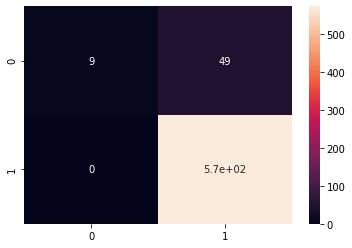

In [327]:
# View the confusion matrix of the Random Forest Classifier Model 
sns.heatmap(cm, annot=True)

### Classification Report

In [328]:
# Check the evaluation of the Random Forest Classifier Model
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.16      0.27        58
           1       0.92      1.00      0.96       572

    accuracy                           0.92       630
   macro avg       0.96      0.58      0.61       630
weighted avg       0.93      0.92      0.90       630



# Findings

###Original Model:

There was a total of 630 predictions (630 customers were being for the type of feedback they would possibly have). Out of those 630 cases, the model predicted "positive feedback" 621 times and "negative feedback" 9 times. In reality, 572 passengers in the sample have gave a positive feedback and 58 passengers gave back a negative feedback.

* **Precision**: Out of all the predictive positive cases, the model predicted correctly 92% of the time.

* **Recall**: Out of all the positive cases, the model predicted correctly 100% of the time.

* **F1**: 96%

* **Accuracy**: Overall, the model was correct 92% of the time

* **Misclassification Rate**: Overall, the model was 7.8% of the time incorrect

* **True Positive Rate**: 100% of the time the model predicted that the customer gave a positive feedback and they actually did give a positive feedback.

* **False Positive Rate**: 84.5% of the time the model predicted that the customer gave a positive feedback, but they actually did not give a positve feedback.

* **True Negative Rate**: 15.5% of the time the model predicted that the customer did not give a positve feedback and they actually did not give a positive feedback.

* **False Negative Rate**: 0% of the time the model predicted that the customer did not give a positive feedback, but they actually did give a positive feedback.

###Improvement to Model

There was a total of 630 predictions (630 customers were being for the type of feedback they would possibly have). Out of those 630 cases, the model predicted "positive feedback" 621 times and "negative feedback" 9 times. In reality, 572 passengers in the sample have gave a positive feedback and 58 passengers gave back a negative feedback.

* **Precision**: Out of all the predictive positive cases, the model predicted correctly 92% of the time.

* **Recall**: Out of all the positive cases, the model predicted correctly 99% of the time.

* **F1**: 95%

* **Accuracy**: Overall, the model was correct 91% of the time

* **Misclassification Rate**: Overall, the model was 8.6% of the time incorrect

* **True Positive Rate**: 99.4% of the time the model predicted that the customer gave a positive feedback and they actually did give a positive feedback.

* **False Positive Rate**: 86.4% of the time the model predicted that the customer gave a positive feedback, but they actually did not give a positve feedback.

* **True Negative Rate**: 13.6% of the time the model predicted that the customer did not give a positve feedback and they actually did not give a positive feedback.

* **False Negative Rate**: 0.5% of the time the model predicted that the customer did not give a positive feedback, but they actually did give a positive feedback.

# Conclusion

Overall, this model is great in predicting positive feedbacks, however, it is poor in predicting negative feedbacks. In the case of predicitng negative feedbacks, it deals with a high precision and a low recall. This means that this model casts a very small but highly specialised net. It does not catch a lot of negative feedbacks, but there is almost only positive feedbacks it catches. This model is very picky, and it does not think that many of the feedbacks are negative. All of the feedbacks it thinks are positive are actually positive. However, it misses a lot of feedbacks that are negative because the model is very picky and it does not have enough cases that present a negative feedback. 

This is seen in both the original model and in the improved model. However, the improved model does perform better compared to the original model. Adding length to the dataframe showed an improvement in the model. 